In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_faithfulness_plots(gatt_list: np.array, 
                            gatt_sim_list: np.array, 
                            avgatt_list: np.array, 
                            pred_list_masked_bool: torch.Tensor,
                            pred_prob_list_masked_float: np.array,
                            entropy_list_masked_float: np.array,
                            dataset_name: str,
                            ) -> None:
    _, axs = plt.subplots(1, 3, figsize=(17, 5), dpi=200)
    red_color = "#DC143C"
    orange_color = "#DB2B14"
    gold_color = "#FF8C00"
    blue_color = "#1E1F71"
    # Scatter plot with alpha=0.5, color #f24141
    axs[0].scatter(
        gatt_list,
        pred_prob_list_masked_float,
        alpha=0.5,
        color=red_color,
        marker="x",
        label="GAtt",
    )
    axs[0].set_title(f"{dataset_name}")
    axs[0].set_xlabel("GAtt")
    axs[0].set_ylabel("ΔPC")

    # Scatter plot with alpha=0.5, color #F97037
    axs[1].scatter(
        gatt_sim_list,
        pred_prob_list_masked_float,
        alpha=0.5,
        color=orange_color,
        marker="x",
        label="GAtt_sim",
    )
    axs[1].set_title(f"{dataset_name}")
    axs[1].set_xlabel("GAtt_sim")
    axs[1].set_ylabel("ΔPC")

    # Scatter plot with alpha=0.5, color #DB4930
    axs[2].scatter(
        avgatt_list,
        pred_prob_list_masked_float,
        alpha=0.5,
        color=gold_color,
        marker="x",
        label="Naive average",
    )
    axs[2].set_title(f"{dataset_name}")
    axs[2].set_xlabel("AvgAtt")
    axs[2].set_ylabel("ΔPC")

    plt.show()

    # Plot a similar graph but use entropy instead of prediction difference
    # Set the figure size to (17, 5)
    # Also show the correlation coefficient for each cases inside the corresponding subplot

    _, axs = plt.subplots(1, 3, figsize=(17, 5), dpi=300)
    axs[0].scatter(
        gatt_list,
        entropy_list_masked_float,
        alpha=0.5,
        color=red_color,
        marker="x",
        label="GAtt",
    )
    axs[0].set_title(f"{dataset_name}")
    axs[0].set_xlabel("GAtt")
    axs[0].set_ylabel("ΔNE")

    axs[1].scatter(
        gatt_sim_list,
        entropy_list_masked_float,
        alpha=0.5,
        color=orange_color,
        marker="x",
        label="GAtt_sim",
    )
    axs[1].set_title(f"{dataset_name}")
    axs[1].set_xlabel("GAtt_sim")
    axs[1].set_ylabel("ΔNE")

    axs[2].scatter(
        avgatt_list,
        entropy_list_masked_float,
        alpha=0.5,
        color=gold_color,
        marker="x",
        label="Naive average",
    )
    axs[2].set_title(f"{dataset_name}")
    axs[2].set_xlabel("Naïve average")
    axs[2].set_ylabel("ΔNE")


    plt.show()

    # Also, plot the data in pred_list_masked_bool (list of 0 and 1s) as a histogram
    # For example, we can divide gatt_list into two groups:
    # 1. pred_list_masked_bool = 1
    # 2. pred_list_masked_bool = 0
    # Then, we can plot the histogram of the two groups in the same plot
    # Adjust the alpha value to make the two histograms distinguishable
    # The x-axis is the attribute value, and the y-axis is the frequency
    # The title of the plot is still the dataset name
    # Like above, we can also plot the histogram of the two groups in the same plot
    # Do it for all three gatt_list, gatt_sim_list, and AvgAtt_list

    # First get the max value of the three lists
    max_gatt_list = max(gatt_list)
    max_gatt_sim_list = max(gatt_sim_list)
    max_AvgAtt_list = max(avgatt_list)

    # Make two masking tensors from pred_list_masked_bool that are complementary
    mask_remained = torch.logical_not(pred_list_masked_bool)
    mask_flipped = pred_list_masked_bool.bool()

    # Make the bins used for the histogram
    bins_attattribute = torch.linspace(0, max_gatt_list, 40)
    bins_GAtt_sim = torch.linspace(0, max_gatt_sim_list, 40)
    bins_AvgAtt = torch.linspace(0, max_AvgAtt_list, 40)

    _, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300)
    axs[0].hist(gatt_list[mask_flipped], 
                bins=bins_attattribute, 
                density=True,
                alpha=0.5, 
                color=red_color,
                label='Prediction changed')
    axs[0].hist(gatt_list[mask_remained], 
                bins=bins_attattribute, 
                density=True,
                alpha=0.5, 
                color=blue_color,
                label='Prediction unchanged')
    axs[0].set_title(f"{dataset_name}")
    axs[0].set_xlabel("GAtt")
    axs[0].set_ylabel("Relative frequency")

    axs[1].hist(gatt_sim_list[mask_flipped], 
                bins=bins_GAtt_sim, 
                alpha=0.5, 
                density=True,
                color=red_color,
                label='Prediction changed')
    axs[1].hist(gatt_sim_list[mask_remained], 
                bins=bins_GAtt_sim, 
                alpha=0.5, 
                density=True,
                color=blue_color,
                label='Prediction unchanged')
    axs[1].set_title(f"{dataset_name}")
    axs[1].set_xlabel("GAtt_sim")
    axs[1].set_ylabel("Relative frequency")

    axs[2].hist(avgatt_list[mask_flipped], 
                bins=bins_AvgAtt, 
                alpha=0.5, 
                density=True,
                color=red_color,
                label='Prediction changed')
    axs[2].hist(avgatt_list[mask_remained], 
                bins=bins_AvgAtt, 
                alpha=0.5, 
                density=True,
                color=blue_color,
                label='Prediction unchanged')
    axs[2].set_title(f"{dataset_name}")
    axs[2].set_xlabel("AvgAtt")
    axs[2].set_ylabel("Relative frequency")

    # Add the legend
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()

    plt.show()

## Arxiv dataset

2L1H

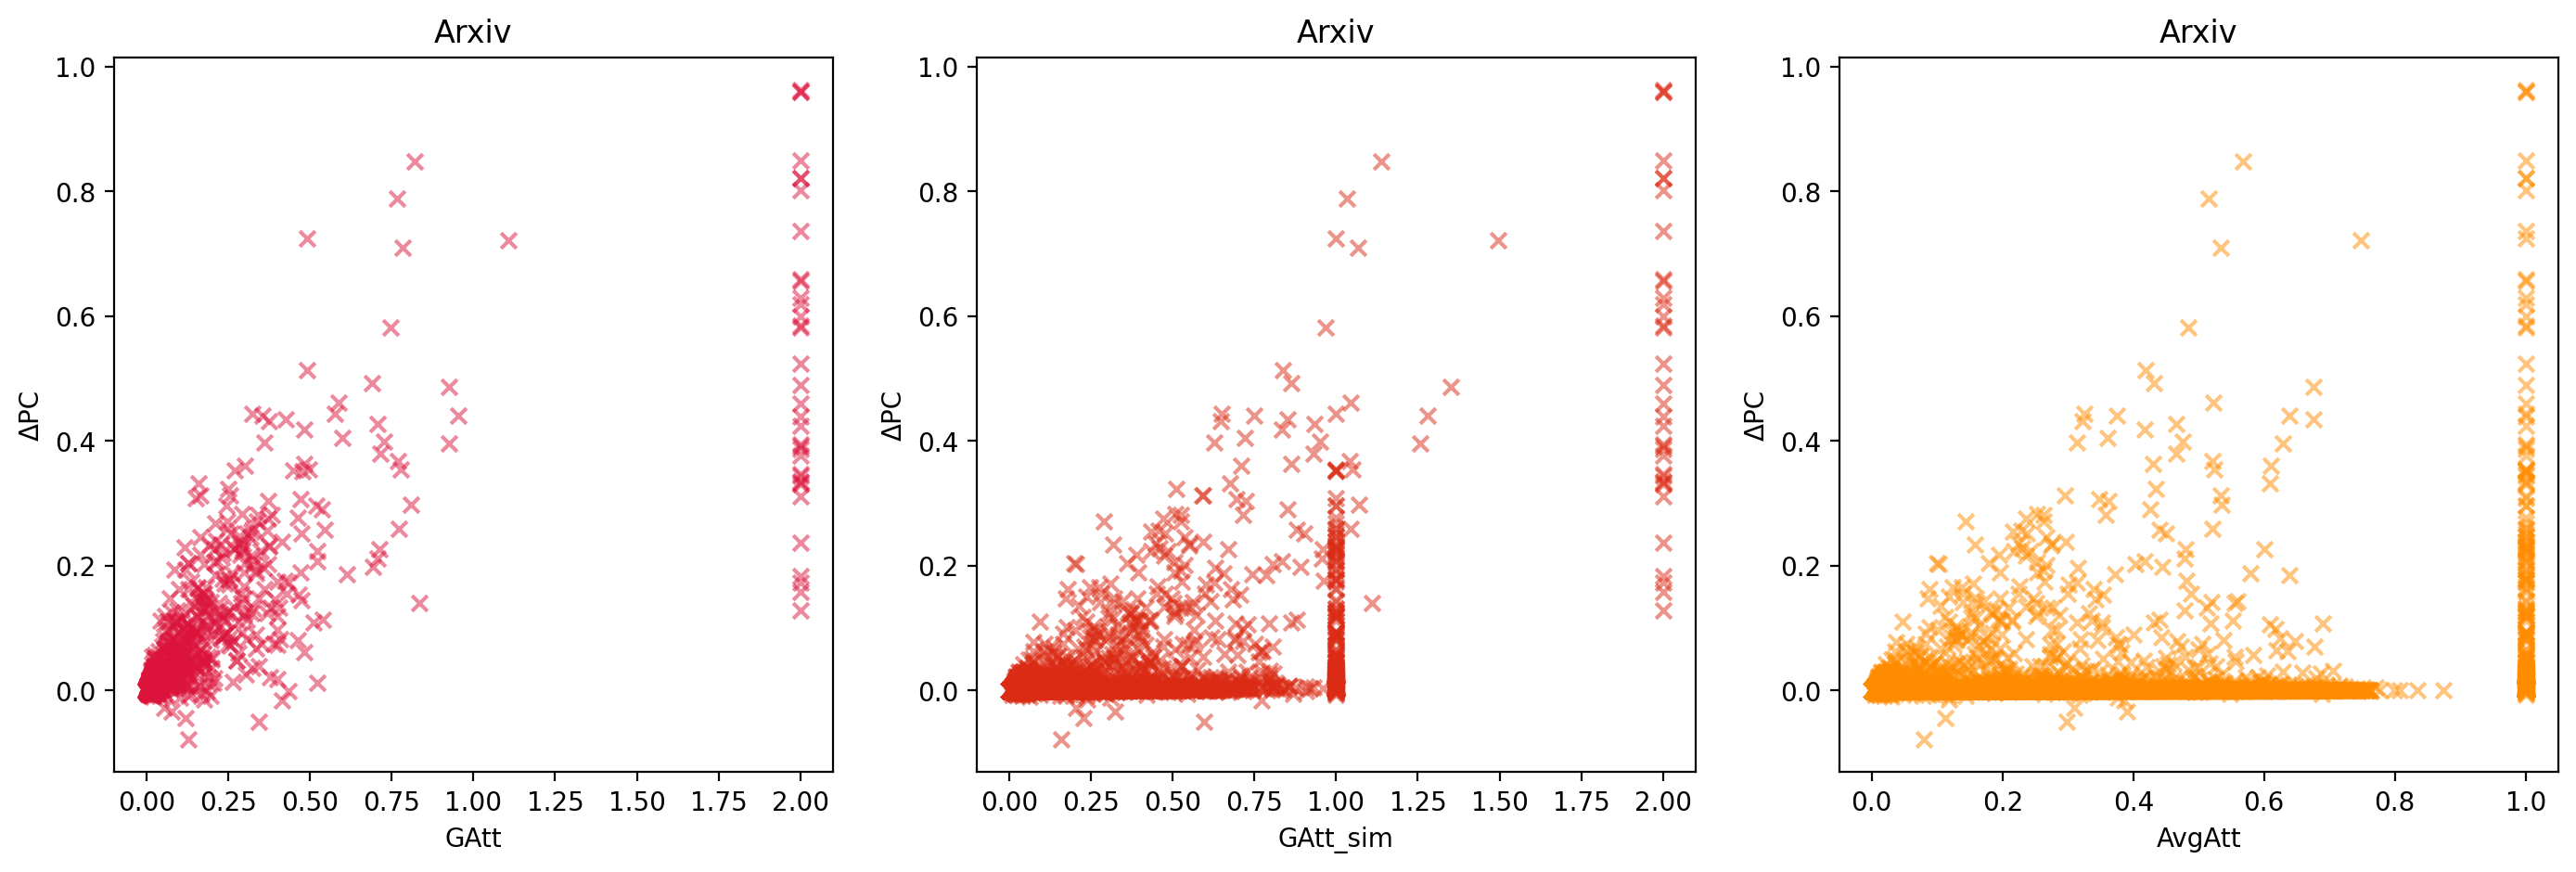

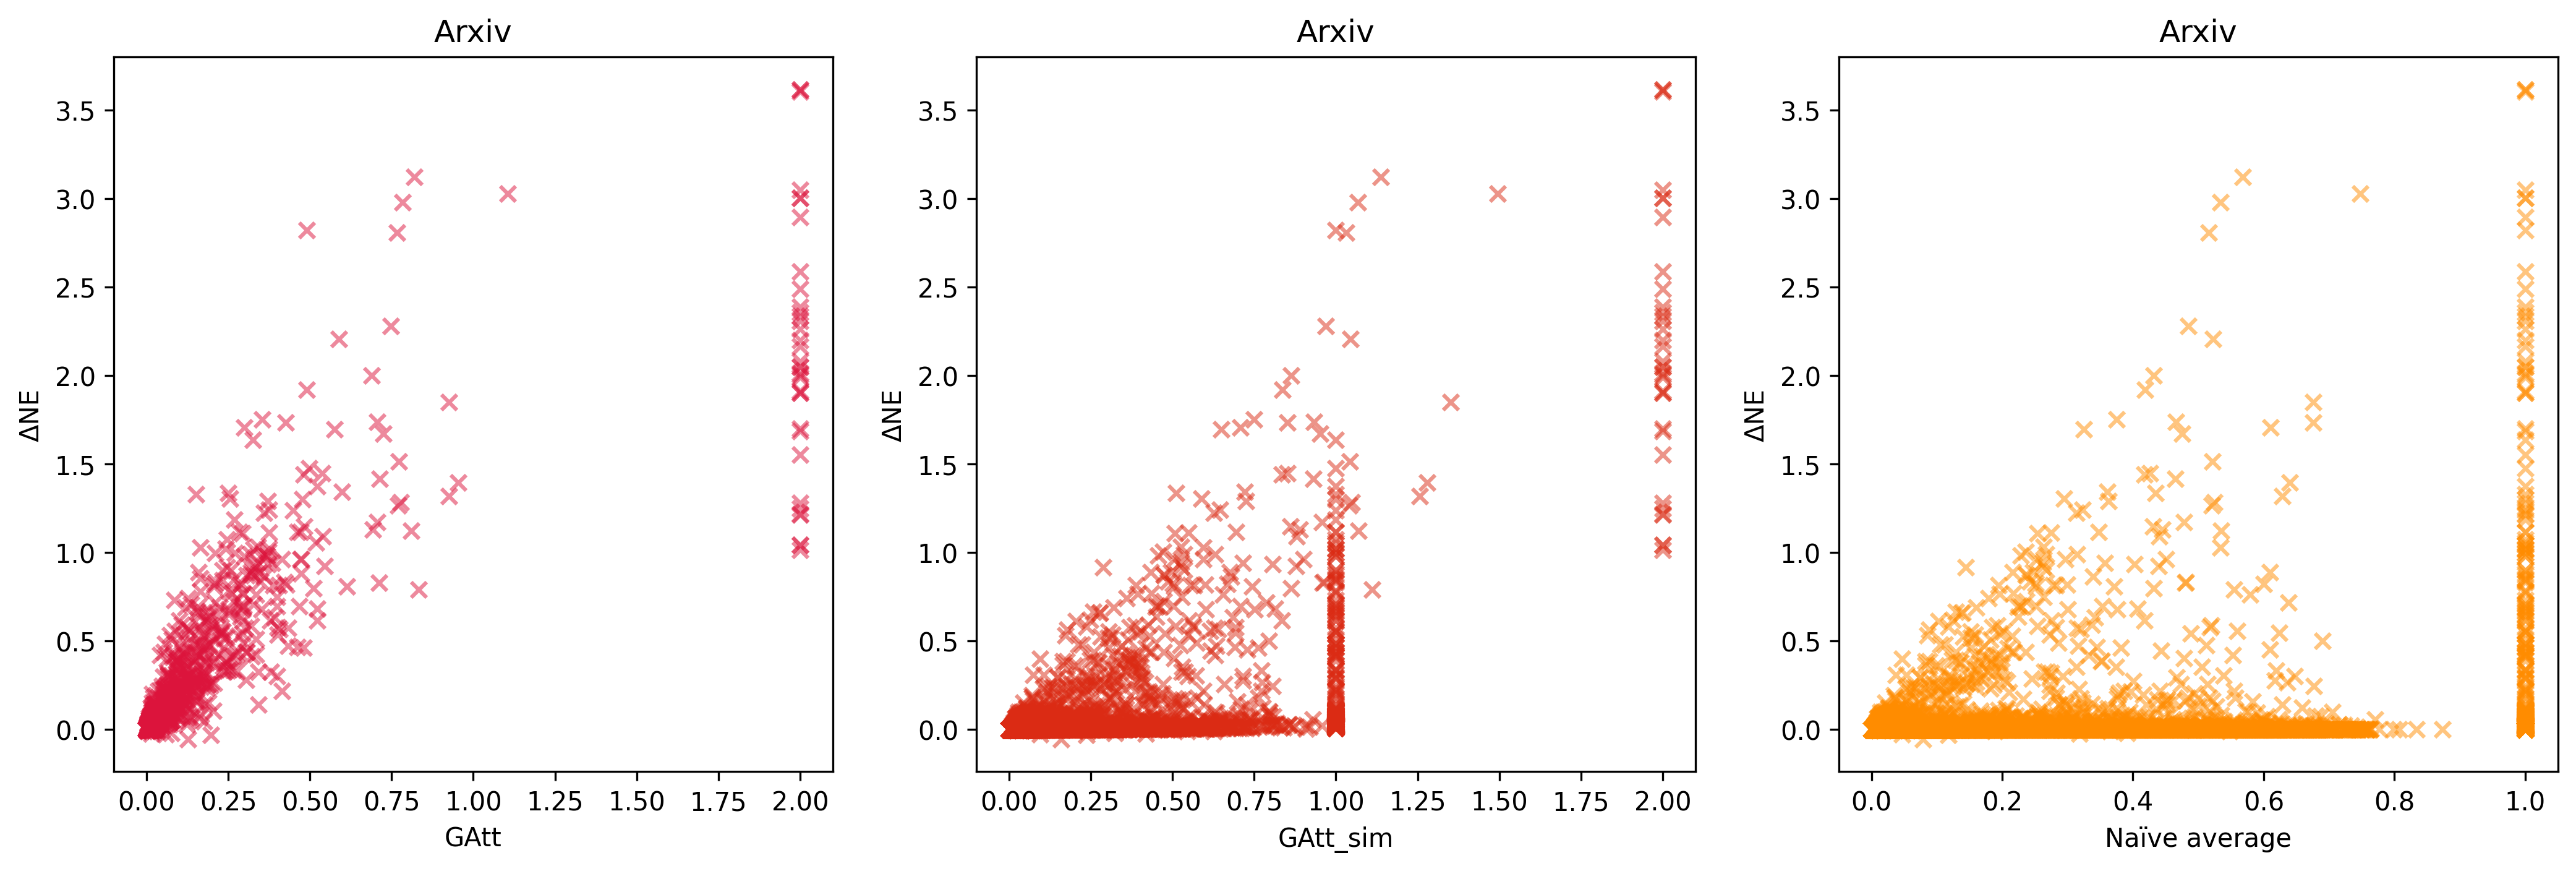

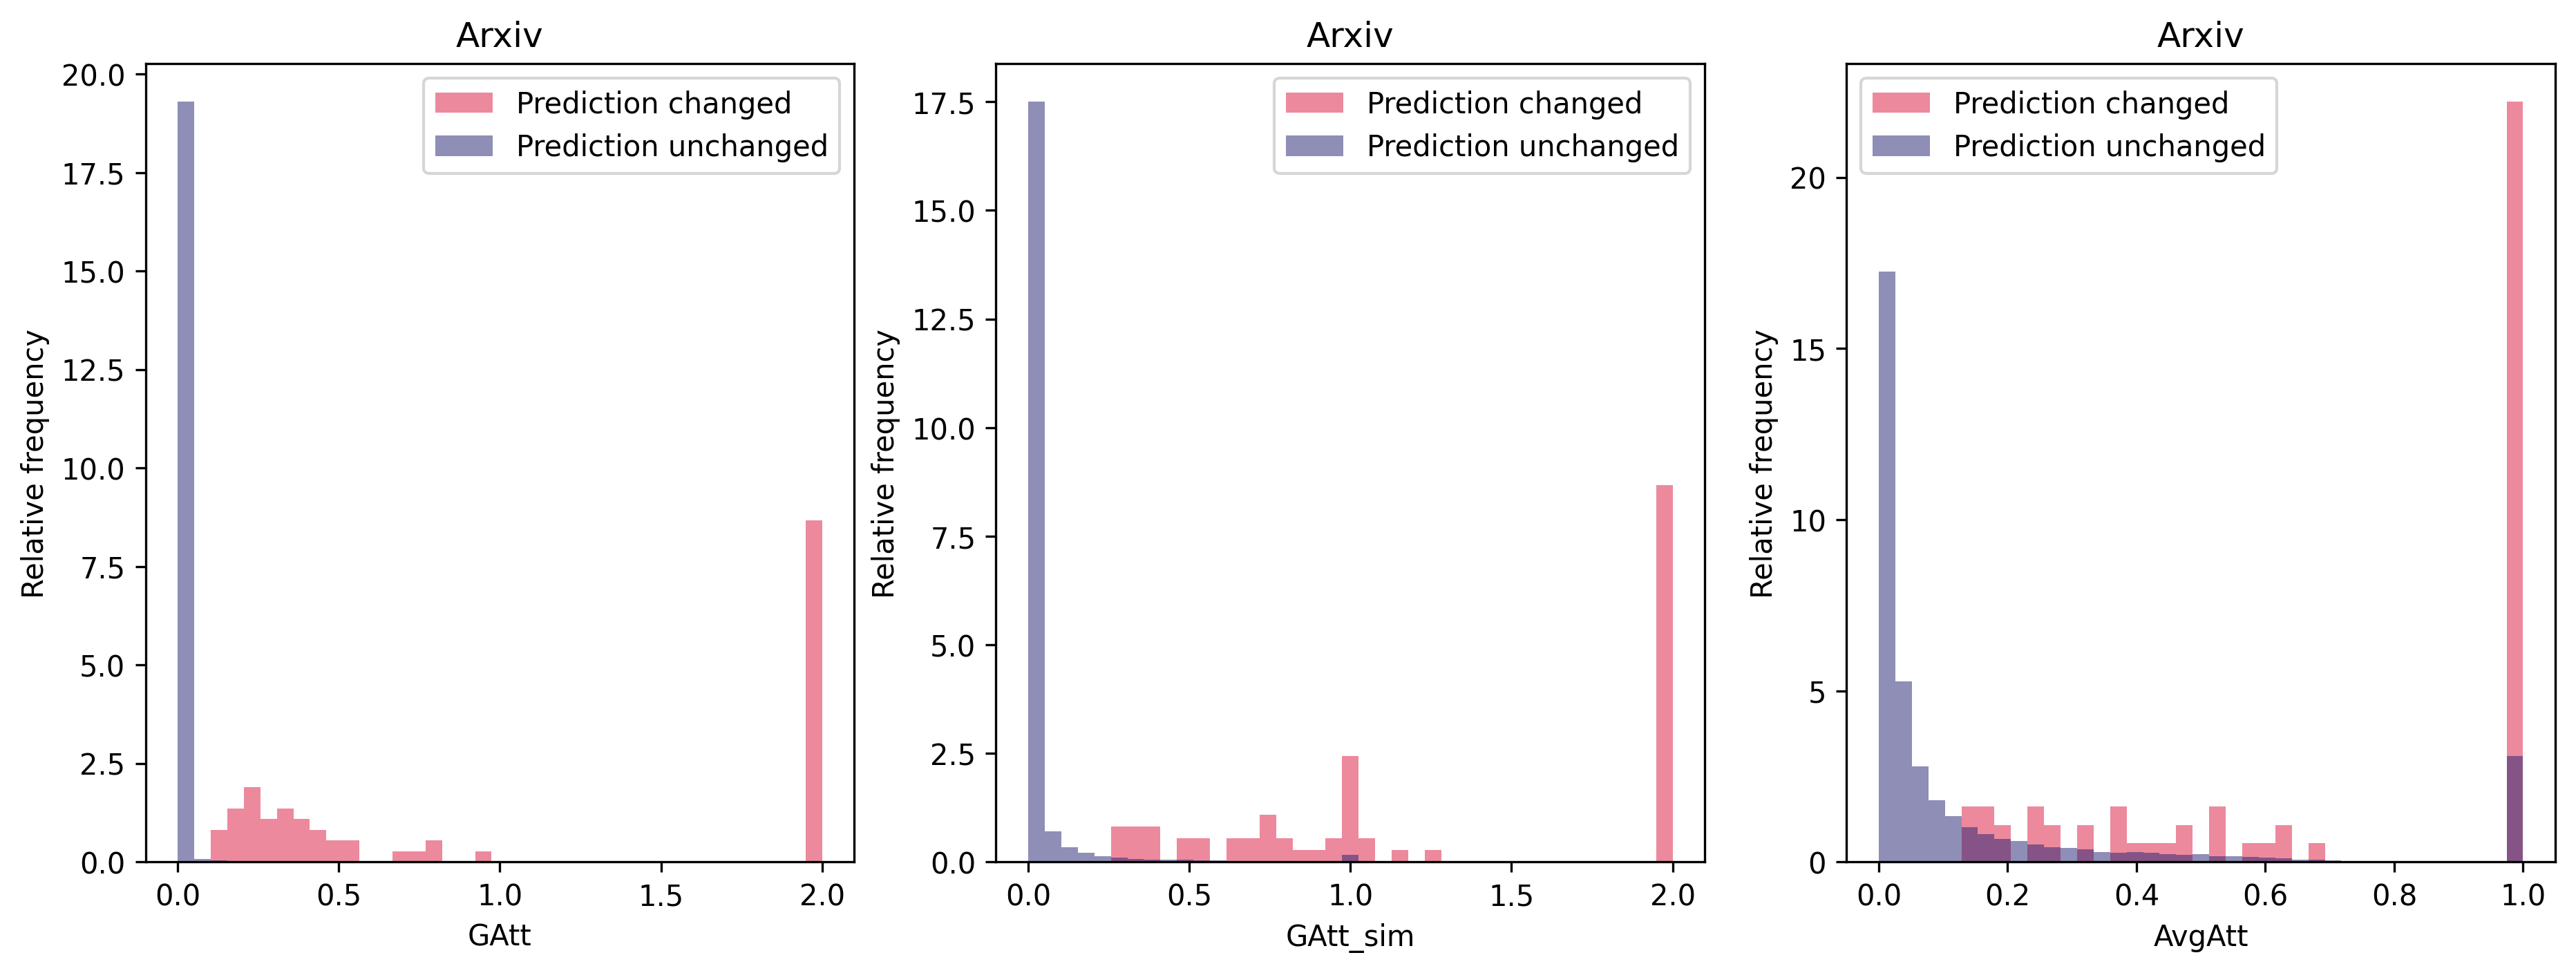

In [2]:
dataset_name = "Arxiv"

config = "2L1H"
# Load experiments from local
attributions = torch.load(
    f"/workspace/Experimental_Artifacts/Faithfulness_GAT_{dataset_name}_{config}_Attributions.pt"
)
interventions = torch.load(
    f"/workspace/Experimental_Artifacts/Faithfulness_GAT_{dataset_name}_{config}_Interventions.pt"
)
gatt_list = np.array(attributions["attattribute"])
gatt_sim_list = np.array(attributions["attattribute_sim"])
avgatt_list = np.array(attributions["avgatt"])
pred_list_masked_bool = torch.Tensor(interventions["pred_list_masked_bool"])
pred_prob_list_masked_float = np.array(interventions["pred_prob_list_masked_float"])
entropy_list_masked_float = -np.array(interventions["entropy_list_masked_float"])

plot_faithfulness_plots(gatt_list=gatt_list,
                        gatt_sim_list=gatt_sim_list,
                        avgatt_list=avgatt_list,
                        pred_list_masked_bool=pred_list_masked_bool,
                        pred_prob_list_masked_float=pred_prob_list_masked_float,
                        entropy_list_masked_float=entropy_list_masked_float,
                        dataset_name=dataset_name,)

3L1H

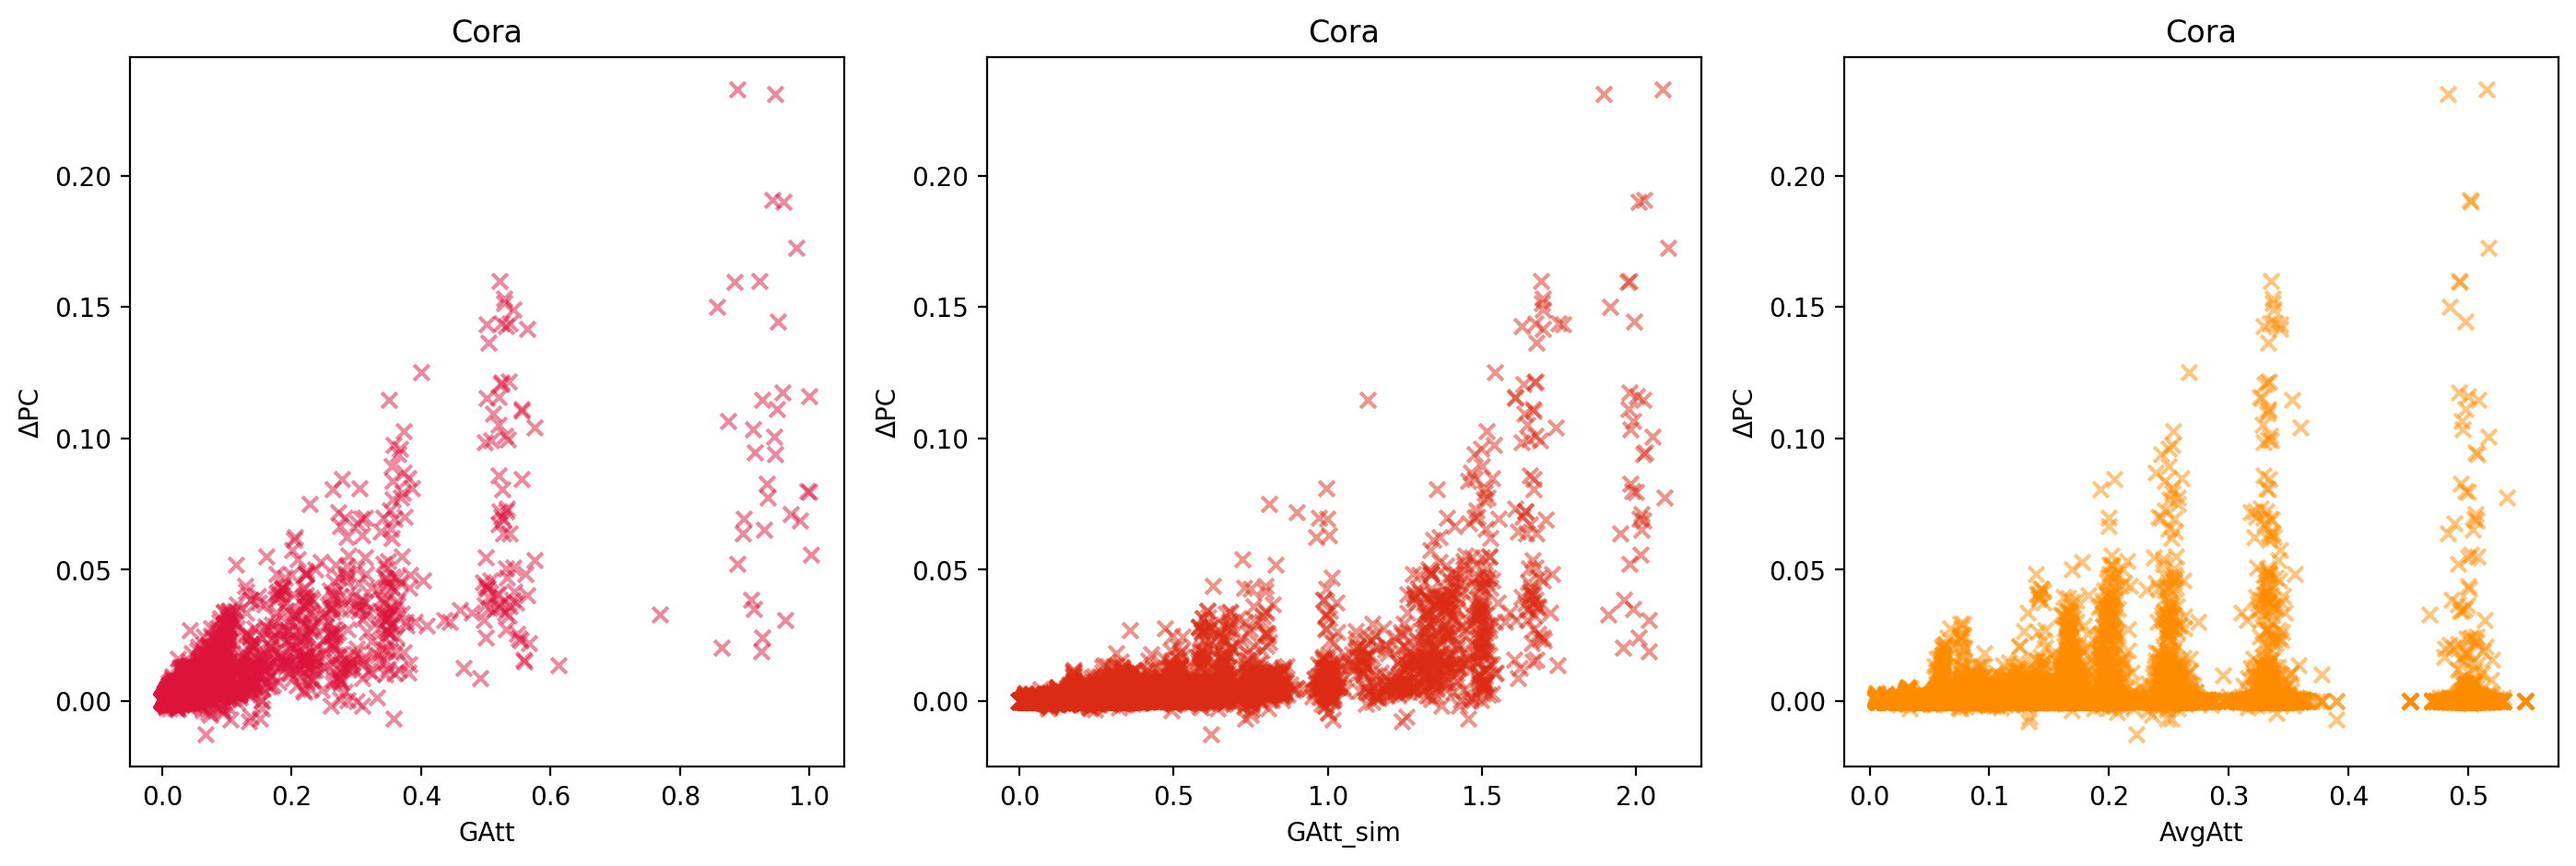

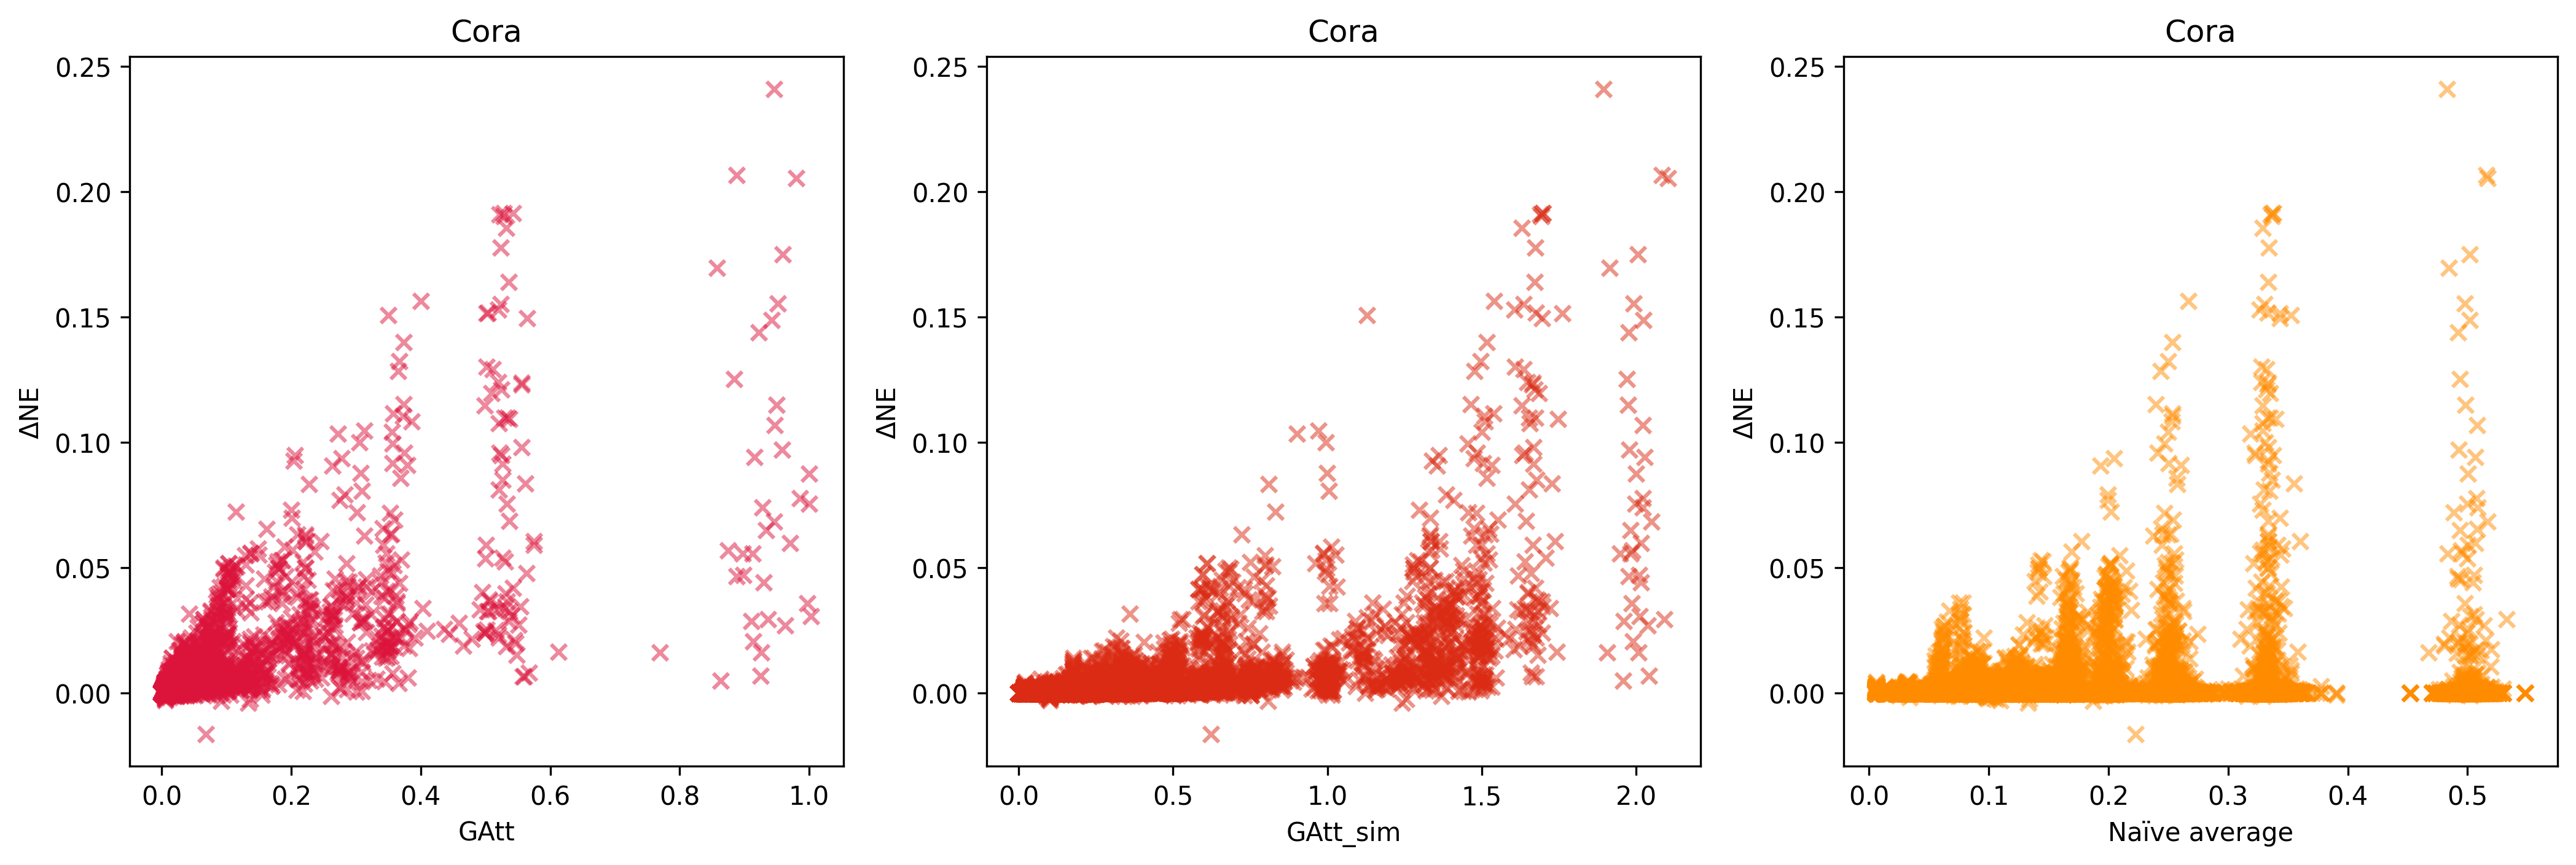

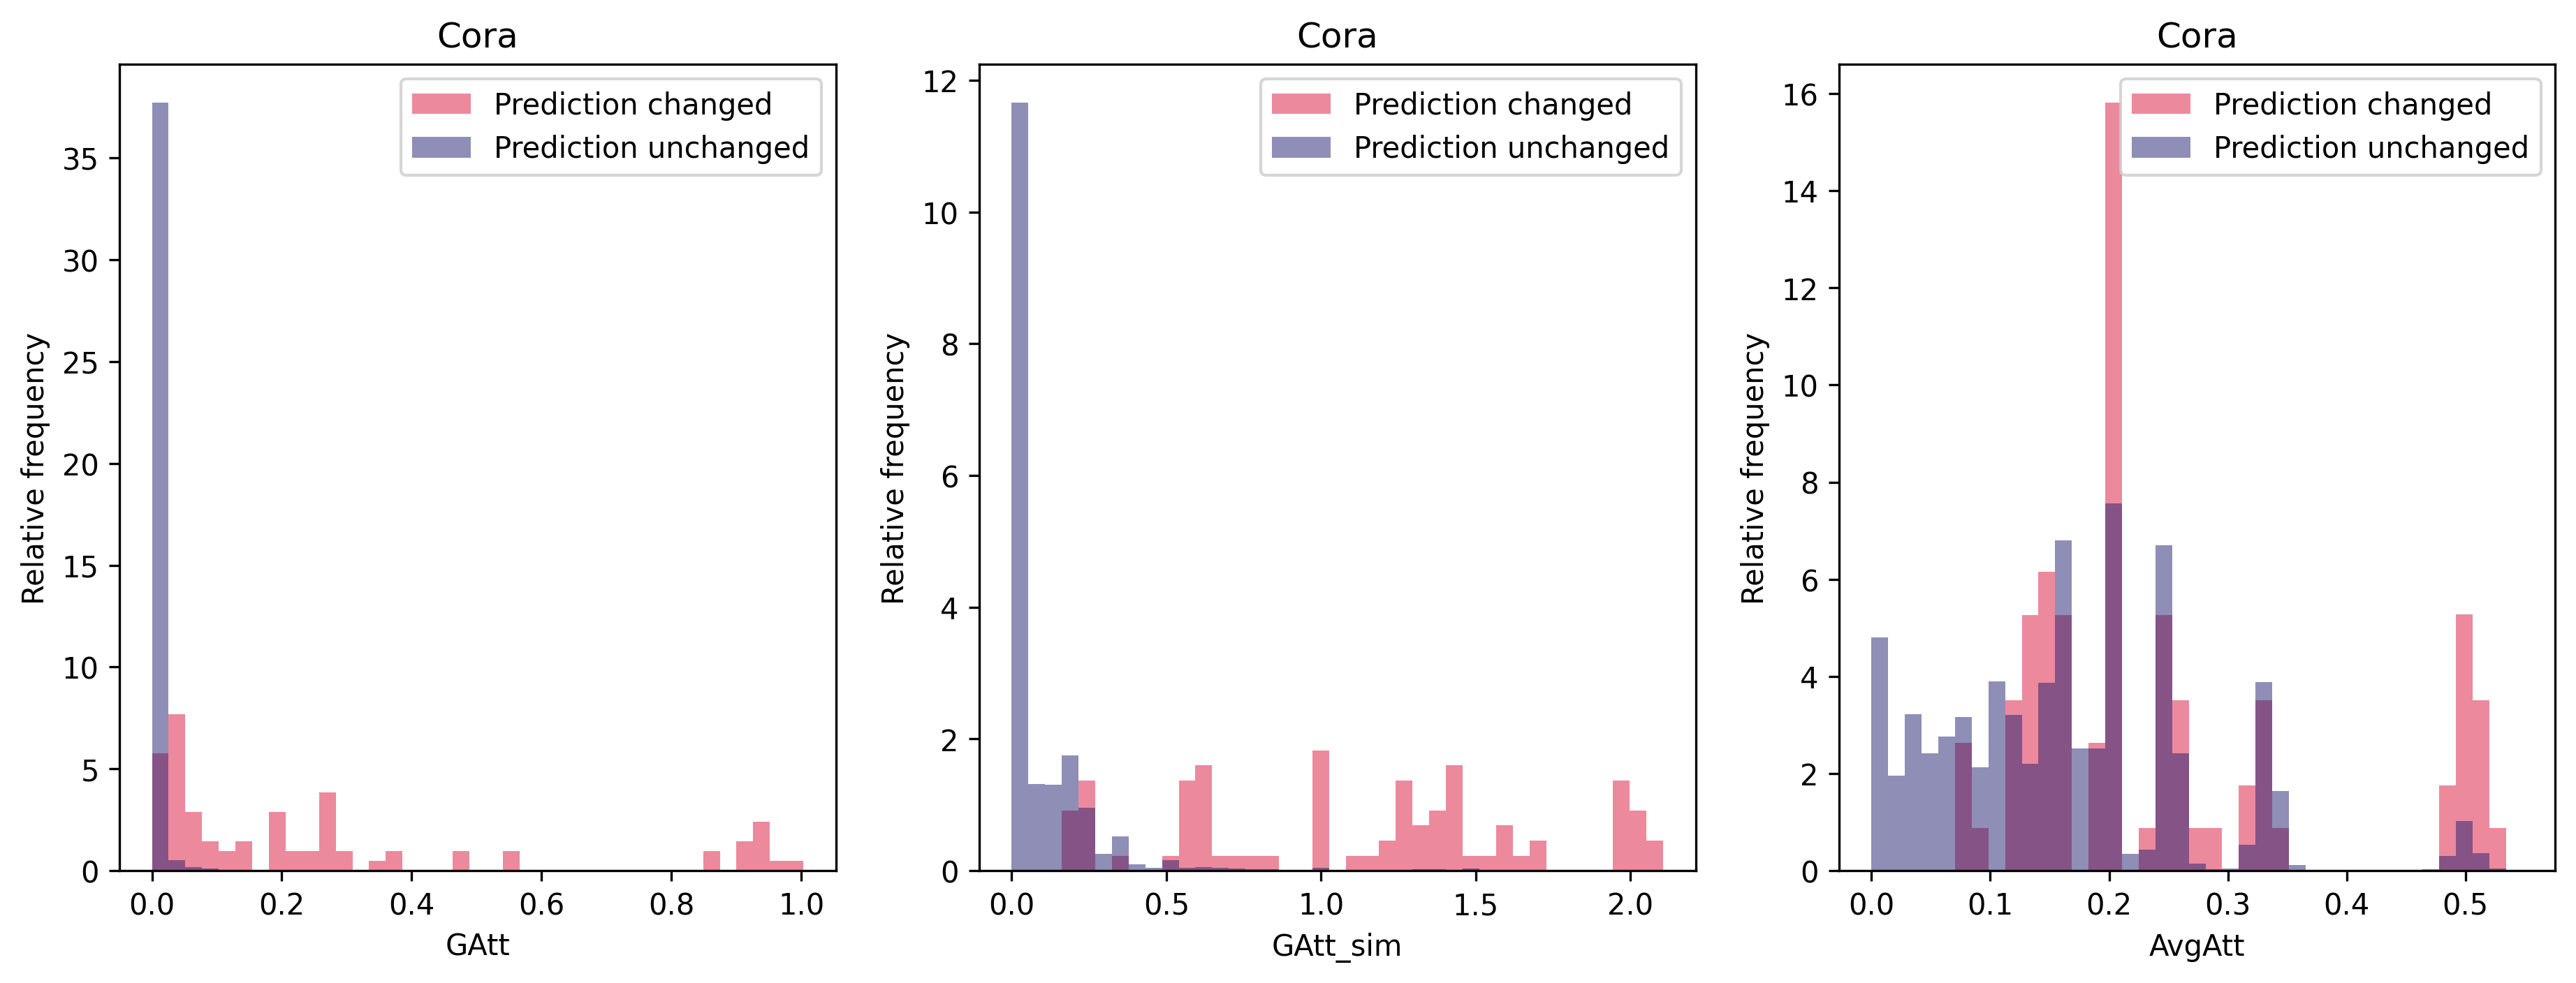

In [15]:
dataset_name = "Arxiv"

config = "3L1H"
# Load experiments from local
attributions = torch.load(
    f"/workspace/Experimental_Artifacts/Faithfulness_GAT_{dataset_name}_{config}_Attributions.pt"
)
interventions = torch.load(
    f"/workspace/Experimental_Artifacts/Faithfulness_GAT_{dataset_name}_{config}_Interventions.pt"
)
gatt_list = np.array(attributions["attattribute"])
gatt_sim_list = np.array(attributions["attattribute_sim"])
avgatt_list = np.array(attributions["avgatt"])
pred_list_masked_bool = torch.Tensor(interventions["pred_list_masked_bool"])
pred_prob_list_masked_float = np.array(interventions["pred_prob_list_masked_float"])
entropy_list_masked_float = -np.array(interventions["entropy_list_masked_float"])

plot_faithfulness_plots(gatt_list=gatt_list,
                        gatt_sim_list=gatt_sim_list,
                        avgatt_list=avgatt_list,
                        pred_list_masked_bool=pred_list_masked_bool,
                        pred_prob_list_masked_float=pred_prob_list_masked_float,
                        entropy_list_masked_float=entropy_list_masked_float,
                        dataset_name=dataset_name,)